In [35]:
from bulk import *

In [36]:
import numpy as np

In [55]:
for name in ['h148','h229','h242','h329']:
    print(name)
    data = read_file(name)
    halo1data = data[data.haloid==1]
    Mv = halo1data.V_mag[0]

    Mv_sol = 4.83
    L = 10**((Mv_sol - Mv)/2.5)
    print('Direct from pynbody: %.2e Msol' % halo1data.M_star[0])
    print('Estimated from V-band magnitude: %.2e Msol' % L)

h148
Direct from pynbody: 1.93e+11 Msol
Estimated from V-band magnitude: 1.01e+11 Msol
h229
Direct from pynbody: 1.02e+11 Msol
Estimated from V-band magnitude: 4.35e+10 Msol
h242
Direct from pynbody: 8.97e+10 Msol
Estimated from V-band magnitude: 3.01e+10 Msol
h329
Direct from pynbody: 8.99e+10 Msol
Estimated from V-band magnitude: 4.30e+10 Msol


In [84]:
for name in ['h148','h229','h242','h329']:
    print(name)
    data = read_file(name)
    halo1data = data[data.haloid==1]
    Mv = halo1data.R_mag[0]
    print(Mv)

    Mv_sol = 4.65
    L = 10**((Mv_sol - Mv)/2.5)
    print('Direct from pynbody: %.2e Msol' % halo1data.M_star[0])
    print('Estimated from V-band magnitude: %.2e Msol' % L)

h148
-23.08905060854771
Direct from pynbody: 1.93e+11 Msol
Estimated from V-band magnitude: 1.25e+11 Msol
h229
-22.209932972374887
Direct from pynbody: 1.02e+11 Msol
Estimated from V-band magnitude: 5.55e+10 Msol
h242
-21.856687997688095
Direct from pynbody: 8.97e+10 Msol
Estimated from V-band magnitude: 4.01e+10 Msol
h329
-22.189838951920162
Direct from pynbody: 8.99e+10 Msol
Estimated from V-band magnitude: 5.44e+10 Msol


In [11]:

data = read_sat()
data = data[data.n_star > 10]

len(data[data.sSFR<1e-11])/len(data)

0.7634408602150538

In [12]:
import pynbody
s = pynbody.load('/home/akinshol/Data/Sims/newh329/h329.cosmo50PLK.3072gst5HbwK1BH.004096')
s.physical_units()
h = s.halos()

In [22]:

halo = h[29]

In [23]:
len(halo.s)

22

In [24]:
pynbody.analysis.luminosity.halo_mag(halo.s, band='v')

SimArray(-7.90493193)

In [33]:
pynbody.analysis.luminosity.halo_mag(halo.s, band='r')

SimArray(-8.29735023)

In [40]:
data = read_sat()
data = data[data.n_star > 10]
JL_rmags = data.R_mag

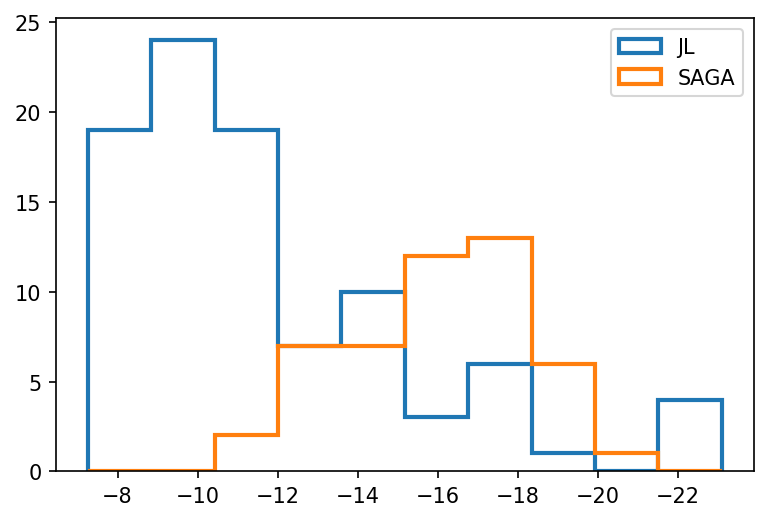

In [47]:
y, binEdges = np.histogram(np.array(JL_rmags,dtype=float),bins=10)
plt.figure(dpi=150)
plt.hist(np.array(JL_rmags,dtype=float),bins=binEdges, histtype='step', linewidth=2, label='JL')
plt.hist(saga_rmags,bins=binEdges, histtype='step', linewidth=2, label='SAGA')
plt.gca().invert_xaxis()
plt.legend()
plt.show()


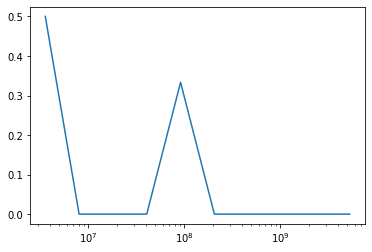

In [83]:
SAGA = pd.read_csv('SAGA_data_cleaned.csv')

Mv_sol = 4.65
L = 10**((Mv_sol - np.array(SAGA.M_r))/2.5)
mass = np.log10(L)

y1, binEdges = np.histogram(mass)
bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
y2, binEdges = np.histogram(mass[SAGA.halpha=='N'], bins = binEdges)
plt.plot(10**bincenters,y2/y1, label='all')

plt.gca().invert_xaxis()
plt.semilogx()
plt.show()